In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# Task 1 - merging 12 months of file into a single data

In [131]:
files=[file for file in os.listdir('C:/Users/JARED/Desktop/Datasets/Sales_Data/')]
all_month_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('C:/Users/JARED/Desktop/Datasets/Sales_Data/' + file)
    all_month_data=pd.concat([all_month_data,df])
all_month_data.to_csv('final_data.csv', index=False)

In [132]:
final_data=pd.read_csv('final_data.csv')

In [ ]:
#check if our data is correctly read

In [133]:
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# there is NaN values , so let us clean our data by dropping rows of NaN values
#we use isnull().sum() to check NaN values, and drop them using .dropna() method

In [134]:
final_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [135]:
remove_nan=final_data.dropna(how='all')
final_data=remove_nan.copy()
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [136]:
final_data.shape

(186305, 6)

In [ ]:
#slicing data using .iloc[range] or .iloc[a,b] where a is rows and b columns

In [144]:
final_data.iloc[7450:7500]

In [ ]:
# removing/dropping "Or" and "Quantity ordered" rows by using (!=) sign to select all rows we want

In [151]:
final_data=final_data[final_data['Order Date'].str[0:2] !='or']

In [149]:
final_data=final_data[final_data['Quantity Ordered']!= 'Quantity Ordered']

In [153]:
final_data.shape

(185950, 6)

In [194]:
final_data=final_data.drop(['Year'], axis=1)

In [ ]:
#converting order date into datetime format

In [155]:
final_data['Order Date']=pd.to_datetime(final_data['Order Date'])

In [162]:
final_data['Year']=final_data['Order Date'].dt.year
final_data['Month']=final_data['Order Date'].dt.month

In [163]:
final_data.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",2019,9


In [94]:
# converting quantity ordered and price to numeric

In [164]:
final_data['Price Each']=pd.to_numeric(final_data['Price Each'])

In [165]:
final_data['Quantity Ordered']=pd.to_numeric(final_data['Quantity Ordered'])

In [166]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int64         
 7   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 12.8+ MB


In [108]:
# calculate sales column

In [167]:
final_data['Sales']=final_data['Quantity Ordered']* final_data['Price Each']

In [195]:
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [169]:
# QUESTION 1: What was the best month for sales? How much was earned that month?

In [204]:
final_data.groupby('Month').sum().sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


In [188]:
#the best month is December with total sales of 4613443.34

<AxesSubplot:xlabel='Month'>

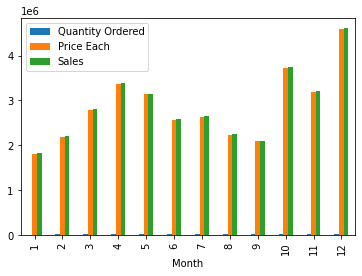

In [197]:
final_data.groupby('Month').sum().plot(kind='bar')

In [ ]:
#from the bar graph the bes month is december

In [ ]:
#QUESTION 2: Which city has the highest number of sales?

In [ ]:
# we will add one column named city to answer this question

In [198]:
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [192]:
final_data['City']=final_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [199]:
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [203]:
final_data.groupby('City').sum().sort_values(by=['Sales'])

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Austin,11153,1809873.61,69829,1819581.75
Portland,14053,2307747.47,87765,2320490.61
Seattle,16553,2733296.01,104941,2747755.48
Dallas,16730,2752627.82,104620,2767975.40
Atlanta,16602,2779908.20,104794,2795498.58
Boston,22528,3637409.77,141112,3661642.01
New York City,27932,4635370.83,175741,4664317.43
Los Angeles,33289,5421435.23,208325,5452570.80
San Francisco,50239,8211461.74,315520,8262203.91


In [ ]:
#The City with highest sales is San Francisco: 8262203.9

<AxesSubplot:xlabel='City'>

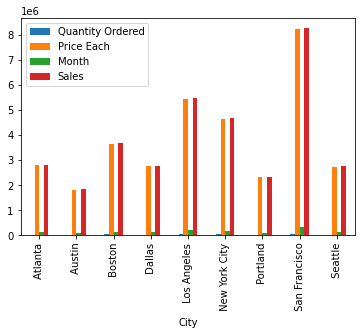

In [201]:
final_data.groupby('City').sum().plot(kind='bar')

In [ ]:
# From the bar the city with highest sales is San Francisco

In [ ]:
#Question 3: What time should we display advertisements to increase customer likelihood of buying products?

In [ ]:
# We need to create hours column by extracting hours from order date

In [208]:
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [207]:
final_data['Hour']=final_data['Order Date'].dt.hour
final_data['Minute']=final_data['Order Date'].dt.minute

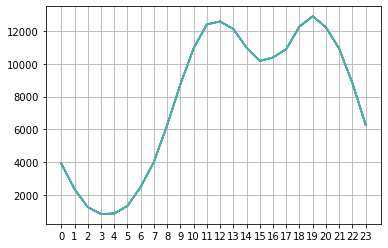

In [220]:
hours_data=final_data.groupby(['Hour']).count()
plt.plot(hours_data)
plt.xticks(hours)
plt.grid()
plt.show()

In [222]:
df=final_data[final_data['Order ID'].duplicated(keep=False)]
df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\JARED\AppData\Local\Temp\ipykernel_10896\4033811541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [225]:
from itertools import combinations
from collections import Counter
count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
